# Requirements

pip install ipykernel numpy tensorflow 



In [77]:
# Load in input data (DIY)
import numpy as np

def read_input_data(file_path):
    temp_list = []
    with open(file_path) as f:
        lines=f.readlines()
        for line in lines:
            line = line.split()
            if line:            
                line = [float(numbers) for numbers in line]
                temp_list.append(line)
    return np.array(temp_list)

dummy_A = read_input_data(r'data_source\test_data.txt')

# ------------------------------------------------------------

# Load in input data (Easier way)        
dummy_B = np.loadtxt(r'data_source\test_data.txt', delimiter=' ', dtype=float)


print((dummy_A==dummy_B).all())
print(dummy_A.shape)
print(dummy_B.shape)

True
(100, 2)
(100, 2)


In [78]:
test_data = np.loadtxt(r'data_source\test_data.txt', delimiter=' ', dtype=float)
training_data = np.loadtxt(r'data_source\training_data.txt', delimiter=' ', dtype=float)
validation_data = np.loadtxt(r'data_source\validation_data.txt', delimiter=' ', dtype=float)

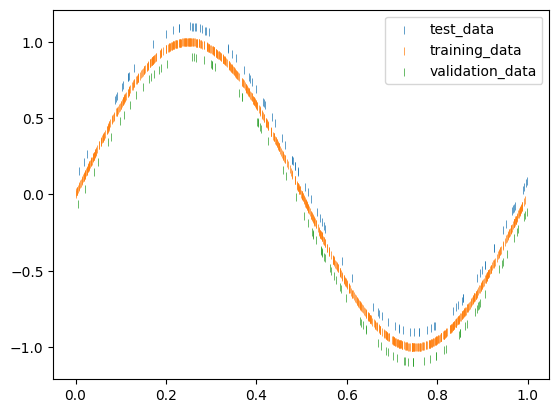

In [79]:

import matplotlib.pyplot as plt

plt.scatter(x = test_data[:,0] ,  y = test_data[:,1] + 0.1   ,marker="|" , label = "test_data"  , linewidths=0.5)
plt.scatter(x = training_data[:,0] ,  y = training_data[:,1] ,  marker="|" , label = "training_data" , linewidths=0.5 )
plt.scatter(x = validation_data[:,0] ,  y = validation_data[:,1] - 0.1 ,  marker="|" , label = "validation_data" , linewidths=0.5)
plt.legend()

In [80]:
test_data[ : , 1 ]

array([-0.59413172, -0.45307409, -0.82230611,  0.66874362,  0.22203742,
       -0.95868727,  0.71754437, -0.99999201,  0.11647421,  0.85577203,
        0.27205548,  0.66839621,  0.79208906,  0.50798952,  0.11387754,
        0.88250991,  0.99793372, -0.77891948, -0.53358159,  0.97288834,
       -0.0142831 ,  0.9987619 , -0.08652634, -0.99783273, -0.93279885,
        0.40576434, -0.98564704,  0.08913979, -0.97655003,  0.05415628,
       -0.17814815, -0.97750719,  0.54311298,  0.72668553, -0.20884497,
        0.9914954 ,  0.16348055,  0.99979487,  0.12666053, -0.29603011,
        0.59219933, -0.98617595, -0.86277403,  0.53137383, -0.64653821,
       -0.02648457, -0.30660164, -0.21499142,  0.82102055, -0.332195  ,
       -0.18985417,  0.6037806 , -0.32590131,  0.48379382, -0.88124256,
        0.6783237 ,  0.9953621 ,  0.98372481,  0.12712246, -0.96324784,
       -0.77906334, -0.97392646, -0.896103  ,  0.52085161,  0.63879271,
       -0.87234744,  0.96160156, -0.04910468, -0.56167609,  0.66

In [81]:
# NOT DONE YET

"""import tensorflow as tf

class MeanAbsoluteError(tf.keras.metrics.Metric):
    def __init__(self, name='my_mae', **kwargs):
        super(MeanAbsoluteError, self).__init__(name=name, **kwargs)
        self.total = self.add_weight(name='total', initializer='zeros')
        self.count = self.add_weight(name='count', initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        absolute_error = tf.abs((y_true - y_pred)/y_true)
        total_absolute_error = tf.reduce_sum(absolute_error)
        num_samples = tf.cast(tf.size(y_true), tf.float32)
        if sample_weight is not None:
            total_absolute_error = tf.multiply(total_absolute_error, sample_weight)
            num_samples = tf.reduce_sum(sample_weight)
        self.total.assign_add(total_absolute_error)
        self.count.assign_add(num_samples)
    
    def result(self):
        return self.total / self.count
    
    def reset_state(self):
        self.total.assign(0)
        self.count.assign(0)


class Metrics(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self._data = []

    def on_epoch_end(self, batch, logs={}):
        X_val, y_val = self.validation_data[0], self.validation_data[1]
        y_predict = np.asarray(model.predict(X_val))

        y_val = np.argmax(y_val, axis=1)
        y_predict = np.argmax(y_predict, axis=1)

        self._data.append({
            'val_rocauc': roc_auc_score(y_val, y_predict),
        })
        return

    def get_data(self):
        return self._data

metrics = Metrics()
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[metrics])
metrics.get_data()

"""


"import tensorflow as tf\n\nclass MeanAbsoluteError(tf.keras.metrics.Metric):\n    def __init__(self, name='my_mae', **kwargs):\n        super(MeanAbsoluteError, self).__init__(name=name, **kwargs)\n        self.total = self.add_weight(name='total', initializer='zeros')\n        self.count = self.add_weight(name='count', initializer='zeros')\n    \n    def update_state(self, y_true, y_pred, sample_weight=None):\n        absolute_error = tf.abs((y_true - y_pred)/y_true)\n        total_absolute_error = tf.reduce_sum(absolute_error)\n        num_samples = tf.cast(tf.size(y_true), tf.float32)\n        if sample_weight is not None:\n            total_absolute_error = tf.multiply(total_absolute_error, sample_weight)\n            num_samples = tf.reduce_sum(sample_weight)\n        self.total.assign_add(total_absolute_error)\n        self.count.assign_add(num_samples)\n    \n    def result(self):\n        return self.total / self.count\n    \n    def reset_state(self):\n        self.total.assi

In [82]:


def percentage_metric(y_true, y_pred):
        result = abs((y_pred-y_true/(y_true))*100) - 100
        return result


### Regression problem

- No activation at the end
- MSE for loss function (typically)
- Optimizer Rmsprop/Adagrad


In [95]:
def training_plot(history , epoch , batch_size):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["mae"]
    val_acc = history.history["val_mae"]
    custom_perc = history.history["percentage_metric"]
    val_custom_perc = history.history["val_percentage_metric"]

    #https://stackoverflow.com/questions/37360568/python-organisation-of-3-subplots-with-matplotlib
    fig , [[loss_plot , acc_plot] , [custom_plot , Aa]] = plt.subplots(2,2)
    fig.set_figwidth(15)
    fig.set_figheight(10)

    
    loss_plot.set_xticks(range(1 , len(loss) + 1)) # Only dislpay Epochs
    acc_plot.set_xticks(range(1 , len(loss) + 1)) # Only dislpay Epochs

    loss_plot.plot(range(1, len(loss) + 1), loss ,label = "Traning Loss", marker = "o")
    loss_plot.plot(range(1, len(loss) + 1), val_loss, label = "Validation Loss" , marker = "o")
    loss_plot.set_xlabel("Epochs")
    loss_plot.set_ylabel("MSE")
    loss_plot.legend()


    acc_plot.plot(range(1, len(acc) + 1), acc ,label = "Traning MAE", marker = "o")
    acc_plot.plot(range(1, len(acc) + 1), val_acc, label = "Validation MAE" , marker = "o")
    acc_plot.set_xlabel("Epochs")
    acc_plot.set_ylabel("MAE")
    acc_plot.legend()

    custom_plot.plot(range(1, len(acc) + 1), custom_perc ,label = "Traning MAE", marker = "o")
    custom_plot.plot(range(1, len(acc) + 1), val_custom_perc, label = "Validation MAE" , marker = "o")
    custom_plot.set_xlabel("Epochs")
    custom_plot.set_ylabel("MAE")
    custom_plot.legend()

    text = fig.text(0.50, 0.02, f'Epochs: {epoch} , Batch size: {batch_size}', horizontalalignment='center', wrap=True ) 
    fig.tight_layout(rect=(0,.05,1,1)) 
    plt.show()

In [84]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(12, activation='relu', input_shape = (1,)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae' , percentage_metric])
 
X_train = training_data[:,0]
Y_train = training_data[:,1]
X_val = validation_data[:,0]
Y_val = validation_data[:,1]

epoch = 20
batch_size = 5

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)


# Fix X,Y

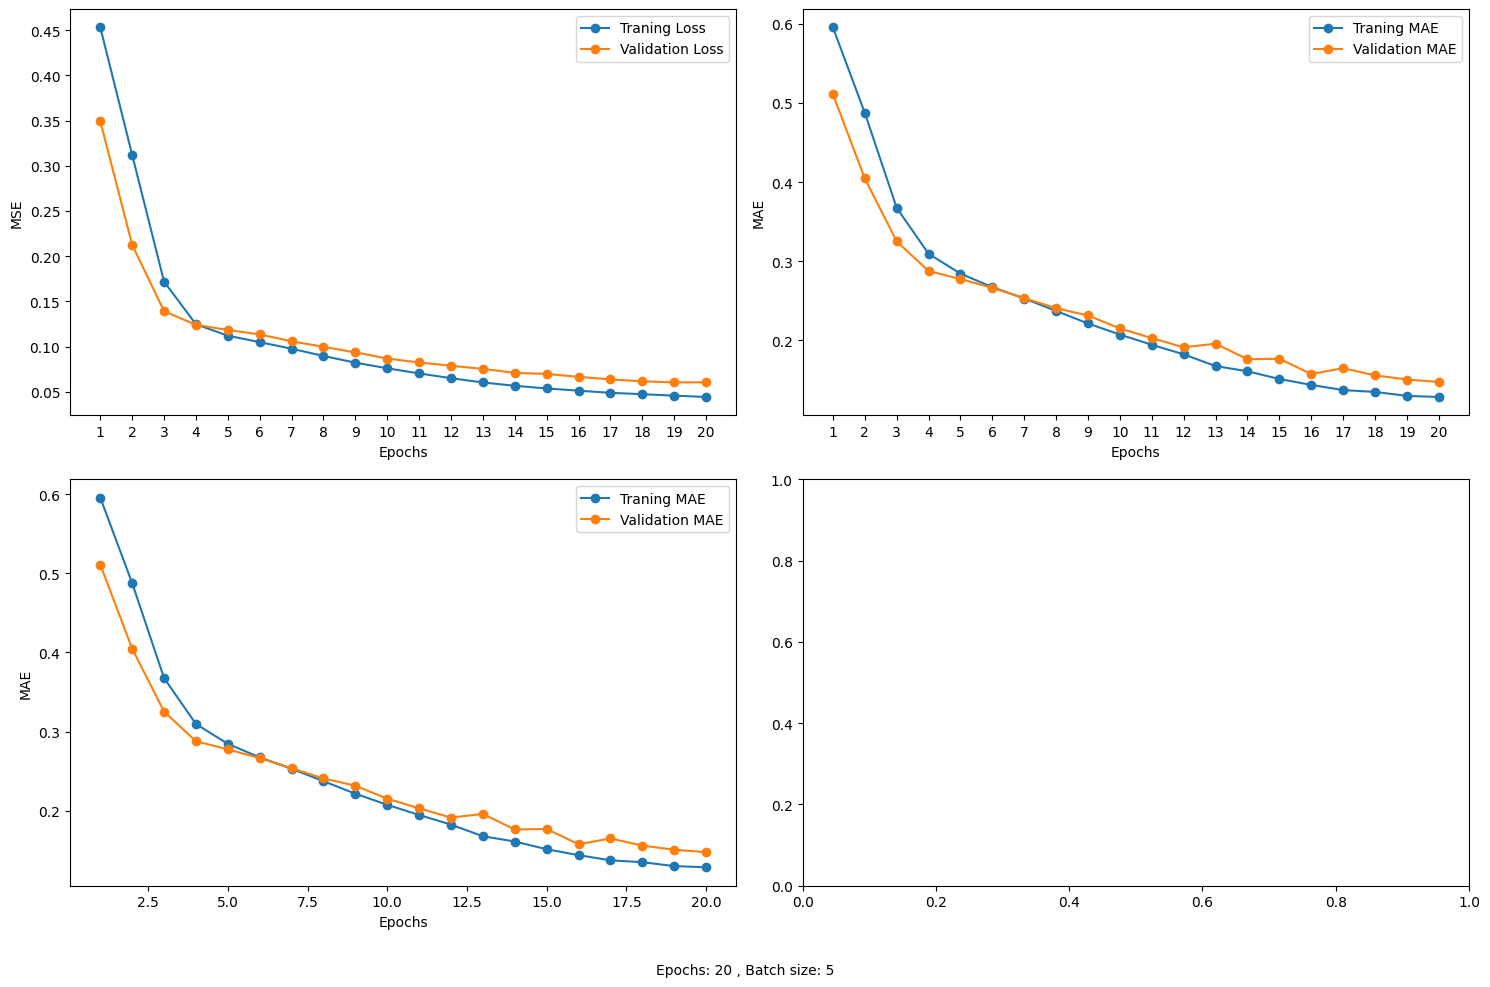

In [96]:
training_plot(history , epoch, batch_size)

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data[:,0], test_data[:,1])

In [ ]:
# Evaulate performance